# Cap 1: Grafos e redes

### 1.2.7 Análise com Networkx

In [1]:
# importa Networkx
import networkx as nx

# importa matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

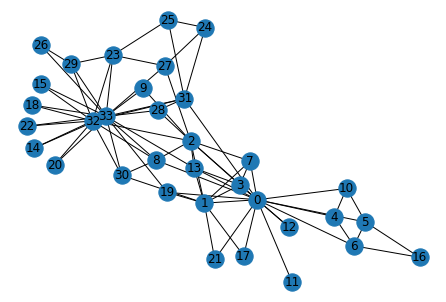

In [2]:
# grafo do clube de karate
G = nx.karate_club_graph() # gera o grafico do clube de karate
nx.draw(G,with_labels = True ) # plota o grafo G

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
# mostra os vértices
nodesG = G.nodes()
print("vétices: ", nodesG)

vétices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [5]:
# mostra as arestas como pares de vértices
edgesG = G.edges()
print("Arestas", edgesG)


Arestas [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


### Desenhando grafos

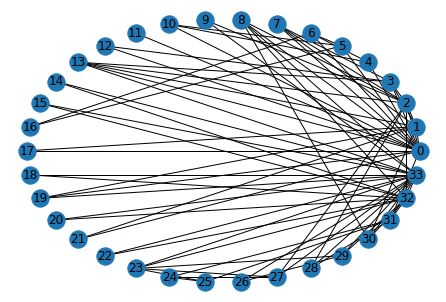

In [6]:
# mostrar o grafo do clube do karate em formato circular
nx.draw_circular (G, with_labels = True )

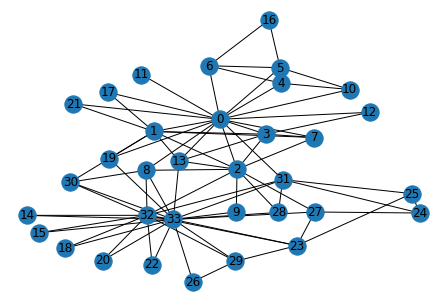

In [7]:
# desenha o grafo G com um "Kamada-Kawai force-directed layout".
nx.draw_kamada_kawai (G, with_labels = True )

In [8]:
# imprime os vizinhos do vértices 12
for n in G.neighbors(12):
    print(n)

0
3


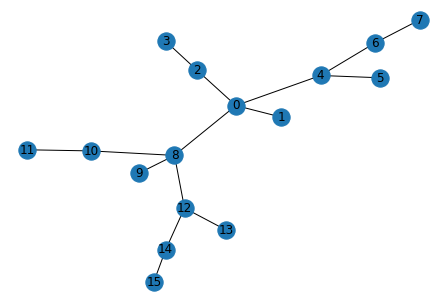

In [9]:
# gera um grafo de uma árvore binomial
# The binomial tree of order 0 consists of a single vertex. 
# A binomial tree of order k is defined recursively by linking two binomial trees of order k-1: 
# the root of one is the leftmost child of the root of the other.
GAB = nx.binomial_tree(4)
nx.draw(GAB, with_labels = "True")

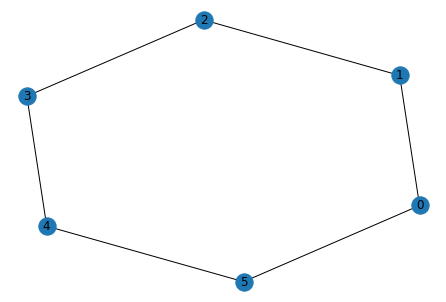

In [10]:
# gera um grafo círculo com 6 nós
GCI = nx.circulant_graph(6 ,[1])
nx.draw(GCI, with_labels="True")

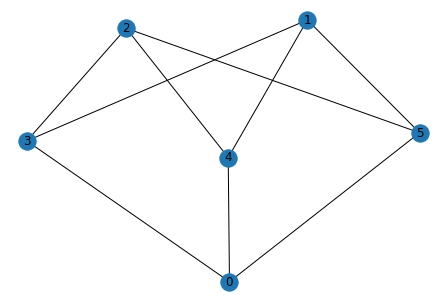

In [11]:
# gerar um grafo regular com 6 nós e 3 arestas por nó
GRE = nx.random_regular_graph(3,6)
nx.draw(GRE, with_labels = "True")

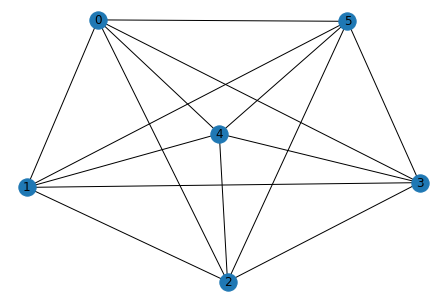

In [12]:
# gerar um grafo completo com 6 nós
GCO = nx.complete_graph(6)
nx.draw(GCO, with_labels = "True")

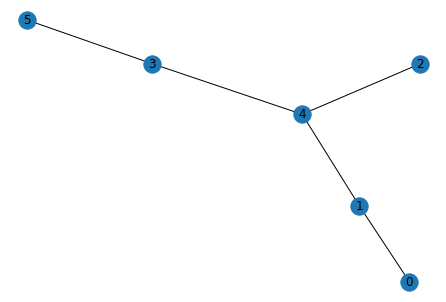

In [13]:
# gera um grafo aleatório de Erdös - Rényi com 6 nós e probabilidade 0.25
GER = nx.gnp_random_graph(6,0.25)
nx.draw(GER, with_labels = "True")

In [14]:
# gerar um grafo direcionado
GD = nx.DiGraph()
type(GD)

networkx.classes.digraph.DiGraph

In [15]:
# adicionando vértices armazenado em uma lista
GD.add_nodes_from (['Avó', 'Avô', 'Pai', 'Mãe', 'Filho', 'Filha'])

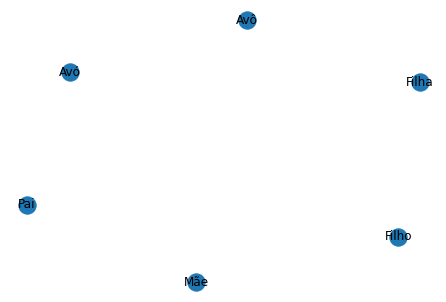

In [16]:
nx.draw(GD,with_labels="True")

In [17]:
# adicionando arestas
GD.add_edge('Avó', 'Pai') # Avó -> Pai
GD.add_edge('Avô', 'Pai') # Avô -> Pai
GD.add_edge('Pai', 'Filho') # Pai -> Filho
GD.add_edge('Pai', 'Filha') # Pai -> Filha
GD.add_edge('Mãe', 'Filho') # Mãe -> Filho
GD.add_edge('Mãe', 'Filha') # Mãe -> Filha

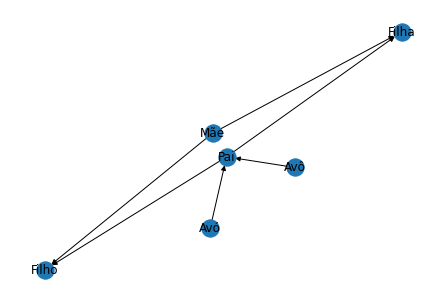

In [18]:
# desenhando o grafo GD
nx.draw(GD, with_labels = "True")

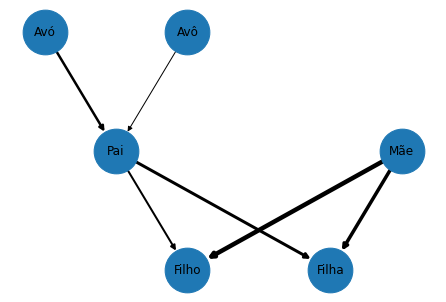

In [19]:
# gerando um grafo direcionado
# lendo os vértices e arestas em um arquivo .txt
GFA = nx.read_edgelist('fami.txt', data = (('peso',float),), create_using = nx.DiGraph)
# definindo a posição dos vértices
pos = nx.circular_layout(GFA)
pos['Avó'] = [-1 ,0]
pos['Avô'] = [+0 ,0]
pos['Pai'] = [-0.5,-0.5]
pos['Mãe'] = [+1.5,-0.5]
pos['Filho'] = [+0.0,-1.0]
pos['Filha'] = [+1.0,-1.0]
# lista da largura das arestas
larg = [(0.5*GFA[u][v]['peso']) for u, v in GFA.edges]
# desennhando o grafo GFA
nx.draw(GFA, pos=pos, node_size=2000, with_labels=True, arrows=True, width=larg )

## 1.3 Métricas Globais de Redes

### 1.3.1 Densidade

Seja uma rede $G=(V,E)$, com $|V|=n$ e $|E|=m$. 

Então, a densidade da rede, $\mathrm{dens}(G)$, é 
- igual a $\dfrac{2m}{n(n-1)}$, se a rede for não direcionada, e 
- igual a $\dfrac{m}{n(n-1)}$ se a rede for direcionada.

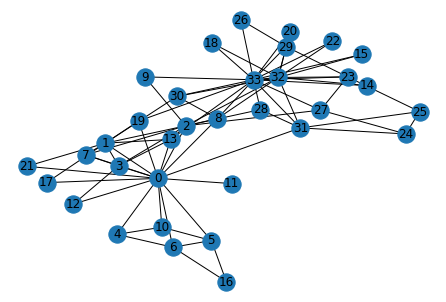

In [20]:
# grafo do clube do karate
karate = nx.karate_club_graph()
nx.draw(karate, with_labels = "True")

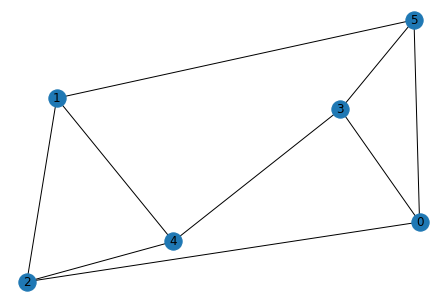

In [21]:
# grafo regular com 6 nós e 3 arestas por nó
gre = nx.random_regular_graph(3,6)
nx.draw(gre, with_labels = "True")

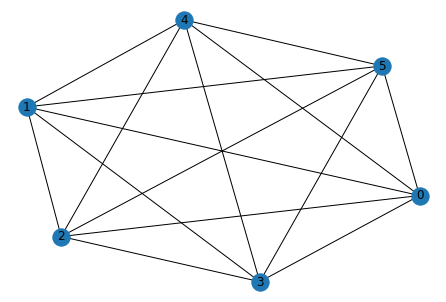

In [22]:
# grafo completo com 6 nós
gco = nx.complete_graph(6)
nx.draw(gco, with_labels = "True")

In [23]:
# imprimindo as densidades
print("Densidades:")
print("karate:", nx.density(karate))
print("gre: ", nx.density(gre))
print("gco: ", nx.density(gco))

Densidades:
karate: 0.13903743315508021
gre:  0.6
gco:  1.0


### 1.3.2 Comprimento médio e caminho

O diâmetro de uma rede é igual ao maior distância geodésica entre dois nós em uma mesma componente da rede. 

Similarmente, o comprimento médio dos caminhos de uma rede é dado pela média de todas as distâncias geodésicas entre dois nós que são conectados na rede.

In [24]:
# caminhos e distância geodésica entre dois vértices
karate = nx.karate_club_graph()
caminho = nx.shortest_path(karate, 3, 20)
longitude = nx.shortest_path_length(karate ,3 ,20)
print("caminho: ", caminho)
print("tamanho: ", longitude)

caminho:  [3, 2, 32, 20]
tamanho:  3


In [25]:
# Comprimento médio dos caminhos do grafo do clube do karate
cm = nx.average_shortest_path_length(karate)

# Diâmetro do grafo do clube do karate
diam = nx.diameter(karate)

print("Comprimento médio =", cm)
print("Diâmentro =", diam)

Comprimento médio = 2.408199643493761
Diâmentro = 5


### 1.3.3 Distribuição de graus

- O grau de um certo vértice de uma rede não direcionada consiste de quantas arestas envolvem este vértice na
rede, ou seja, 
$$d(i) = \displaystyle\sum_{j \in V} A(i,j)$$

- Vértices com alto grau são aqueles que conseguem acessar imediatamente um grande número de vértices.

- Em redes direcionadas, existem dois tipos de grau que dependem da direção das arestas: o grau de saída (out-degree), $d^{out}(i)$, e o grau de entrada (in-degree), $d^{in}(i)$.
$$
d^{out}(i) = \displaystyle\sum_{j \in V} A(i,j)
$$
e
$$
d^{in}(i) = \displaystyle\sum_{j \in V} A(j,i)
$$




In [26]:
# Graus do grafo do clube do karate
karate = nx.karate_club_graph()
a = karate.degree(0) # grau do nó 0
b = list(karate.degree([0 ,17 ,33]) ) # lista de graus dos nós 0 , 1 e 2
c = nx.degree_histogram(karate) # lista com as frequências de ocorrência de graus
print("Grau do vértice 0:", a)
print("Graus dos vértices 0,1,2:", b)
print("Frequências de ocorrência:", c)

Grau do vértice 0: 16
Graus dos vértices 0,1,2: [(0, 16), (17, 2), (33, 17)]
Frequências de ocorrência: [0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


### 1.3.4 Coesão e agrupamento

Redes complexas possuem uma característica de coesão em que nós vizinhos a um certo nó tem uma maior chance de serem vizinhos entre si.

Existem algumas formas de mensurar essa característica, por exemplo, através do conceito de cliques.

Uma maneira de analisar a coesão de uma rede seria analisar a distribuição dos cliques, ou seja, quantos cliques de cada tamanho existem.

Cliques são muito sensíveis a remoção de um nó, assim outras medidas foram propostas para analisar o grau de coesão ou agrupamento da rede. 

O coeficiente de agrupamento total é dado pela proporção de vezes que dois vértices $j$ e $k$ que são vizinhos de um mesmo vértice $i$ também são vizinhos entre si:

$$
cl(G)=
\dfrac{\sum\limits_{(i,j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)A(j,k)}{\displaystyle\sum\limits_{(i,j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)}
$$


In [27]:
karate = nx.karate_club_graph ()
clqlist = list(nx.enumerate_all_cliques(karate)) # lista com todos os cliques
clqlist

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 17],
 [0, 19],
 [0, 21],
 [0, 31],
 [1, 2],
 [1, 3],
 [1, 7],
 [1, 13],
 [1, 17],
 [1, 19],
 [1, 21],
 [1, 30],
 [2, 3],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 13],
 [2, 27],
 [2, 28],
 [2, 32],
 [3, 7],
 [3, 12],
 [3, 13],
 [4, 6],
 [4, 10],
 [5, 6],
 [5, 10],
 [5, 16],
 [6, 16],
 [8, 30],
 [8, 32],
 [8, 33],
 [9, 33],
 [13, 33],
 [14, 32],
 [14, 33],
 [15, 32],
 [15, 33],
 [18, 32],
 [18, 33],
 [19, 33],
 [20, 32],
 [20, 33],
 [22, 32],
 [22, 33],
 [23, 25],
 [23, 27],
 [23, 29],
 [23, 32],
 [23, 33],
 [24, 25],
 [24, 27],
 [24, 31],
 [25, 31],
 [26, 29],
 [26, 33],
 [27, 33],
 [28, 31],
 [28, 33],
 [29, 32],
 [29, 33],
 [30, 32],
 [30, 33],
 [31, 32],

In [28]:
# calculo do tamanho médio dos cliques
karate = nx.karate_club_graph ()
clqlist = list(nx.enumerate_all_cliques(karate)) # lista com todos os cliques
soma = 0
k = len(clqlist)
for clique in clqlist :
    soma = soma + len(clique)
lonmedia = soma / k
print(" Tamanho médio das cliques:", lonmedia)

 Tamanho médio das cliques: 2.2294117647058824


In [29]:
# gerando grafos

# círculo com 6 nós
gci = nx.circulant_graph(6 ,[1])

# grafo regular com 6 nós e 3 arestas por nó
gre = nx.random_regular_graph(3,6)

# grafo completo com 6 nós
gco = nx.complete_graph(6)

In [30]:
# calculando os coeficientes de agrupamento total
cl_karate = nx.transitivity(karate)
cl_gci = nx.transitivity(gci)
cl_gre = nx.transitivity(gre)
cl_gco = nx.transitivity(gco)

In [31]:
# imprimindo os coeficientes de agrupamento total
print("cl^{d,1}(karate):", cl_karate)
print("cl^{d,1}(gci):", cl_gci)
print("cl^{d,1}(gre):", cl_gre)
print("cl^{d,1}(gco):", cl_gco)

cl^{d,1}(karate): 0.2556818181818182
cl^{d,1}(gci): 0
cl^{d,1}(gre): 0.3333333333333333
cl^{d,1}(gco): 1.0


### 1.3.5 Reciprocidade

Em redes direcionadas, uma medida de interesse é saber qual a fração de arestas que ocorrem em ambas as direções.

$$
rc(G)=
\dfrac{\displaystyle\sum\limits_{i,j}A(i,j)A(j,i)}{\displaystyle\sum\limits_{i,j}A(i,j)}.
$$

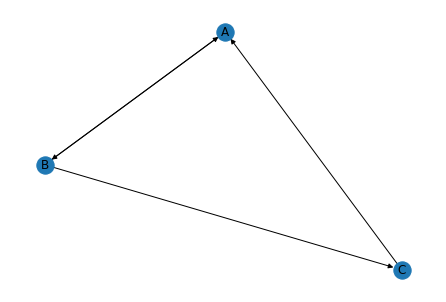

In [32]:
# gerando o grafo direcionado GD
GD = nx.DiGraph ()
GD.add_nodes_from(['A','B','C'])

GD.add_edge('A','B') # A -> B
GD.add_edge('B','A') # B -> A
GD.add_edge('B','C') # B -> C
GD.add_edge('C','A') # C -> A

# plotando o grafo GD
nx.draw(GD, with_labels = "True")

In [33]:
# calculando a reciprocidade do grafo GD
re = nx.reciprocity(GD)

# imprimindo o valor da reciprocidade do grafo GD
print("Reciprocidade GS:", re)

Reciprocidade GS: 0.5


## 1.6 Uma rede complexa real: Wikipédia

In [36]:
import networkx as nx
import wikipedia # a instalar
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# A linguagem de Wikipedia : português
wikipedia.set_lang("pt")

In [40]:
# no raiz
RAIZ = "Fortaleza".title()

In [41]:
# páginas excluidas
EXCL = ("International Standard Serial Number",
"International Standard Book Number",
"National Diet Library",
"International Standard Name Identifier",
"International Standard Book Number (Identifier)",
"Pubmed Identifier", 
"Pubmed Central",
"Digital Object Identifier", 
"Arxiv",
"Proc Natl Acad Sci Usa", 
"Bibcode",
"Library Of Congress Control Number", 
"Jstor",
"OpenStreetMap",
"Wikimapia",
"Instituto Nacional de Meteorologia",
"Instituto Brasileiro de Geografia e Estatística",
"Coeficiente de Gini"
)

In [42]:
# lista de nos por explorar
pend_lst = [(0, RAIZ)] # O vértice RAIZ está na camada 0

In [43]:
# conjunto de nos que ainda devem ser explorados
pend_cnj = set(RAIZ) # Só RAIZ

In [44]:
# conjunto de nos que ja foram explorados
feito_cnj = set() # Nehum nó explorado

In [45]:
F = nx.DiGraph()

In [46]:
camada, pag = pend_lst[0]

In [49]:
while camada < 2:
    del pend_lst[0]
    feito_cnj.add(pag)
    print(camada, pag)
    try:
        wiki = wikipedia.page(pag) 
        # pode ser carregada a pagina?
        wiki.links 
        # bug não dá certo se a página não tem links
    except:
        camada, pag = pend_lst[0]
        print('Nao pude carregar', pag)
        continue
    for link in wiki.links:
        link = link.title()
        if link not in EXCL and not link.startswith("Lista de"):
            if link not in pend_cnj and link not in feito_cnj:
                pend_lst.append((camada + 1, link))
                pend_cnj.add(link)
            F.add_edge(pag, link)
    camada, pag = pend_lst[0]

0 Fortaleza
1 13 De Abril
1 15 De Agosto
1 1726
1 1884
1 19 De Março
1 1 De Abril
1 2019 No Brasil
1 25 De Março
1 89 Fm
1 8 De Dezembro
1 Am Cidade
1 A Igreja De Jesus Cristo Dos Santos Dos Últimos Dias
1 Abolicionismo No Brasil
1 Abril Despedaçado (Filme)
1 Academia Brasileira De Letras
1 Academia Cearense De Letras
1 Academia De Letras
1 Acaraú
1 Acidente Rodoviário
1 Acopiara
1 Acorizal
1 Acre
1 Adolfo Caminha
1 Adolfo Herbster
1 Aeroporto Internacional Pinto Martins
1 Aeroporto Internacional De Fortaleza
1 Agricultura
1 Agropecuária
1 Alagoas
1 Alberto Nepomuceno
1 Alcântara (Maranhão)
1 Aldeamento
1 Aldeota
1 Alfabetização
1 Algodão
1 Alimento
1 Almas (Tocantins)
1 Aloísio Lorscheider
1 Alta Cultura
1 Altitude
1 Alvorada (Rio Grande Do Sul)
1 Amapá
1 Amarelos
1 Amazonas
1 Amazônia
1 Amelinha
1 América Latina
1 Ananindeua
1 Andaraí
1 Angra Dos Reis
1 Antonina
1 António José Da Silva Paulet
1 Antônio Bezerra (Fortaleza)
1 Antônio Cambraia
1 Antônio Pinto Nogueira Acioly
1 Anápolis


/home/jossian/.local/lib/python3.10/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/jossian/.local/lib/python3.10/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Nao pude carregar Bio-Manguinhos
1 Bio-Manguinhos
1 Blues
1 Boa Viagem (Ceará)
1 Boa Vista (Roraima)
1 Bobó De Camarão
1 Bode Ioiô
1 Bogotá
1 Bom Jesus Da Lapa
1 Borba (Amazonas)
1 Bordado
1 Bosque
1 Bovinos
1 Bovril
1 Boémia (Estilo De Vida)
1 Bradesco
1 Bragado (Buenos Aires)
1 Bragança (Pará)
1 Brancos
1 Brasil
1 Brasil Colônia
1 Brasão De Fortaleza
1 Brasília
1 Brega
1 Brejo Da Madre De Deus
1 Budismo
1 Buenos Aires
1 Bus Rapid Transit
1 Ce-025
1 Ce-040
1 Ce-060
1 Ce-065
1 Ce-085
1 Ce-090
1 Conmebol
1 Cabo (Geografia)
1 Cabo Frio
1 Cabo Verde
1 Cabo De Santo Agostinho
1 Cabo De Santo Agostinho (Acidente Geográfico)
1 Cachoeira (Bahia)
1 Caeté
1 Café Santa Clara
1 Cairu
1 Cais Do Porto (Fortaleza)
1 Cajazeiras (Fortaleza)
1 Caju
1 Calama
1 Calçado
1 Camamu
1 Camarão
1 Camaçari
1 Cambeba (Fortaleza)
1 Cambyretá
1 Cametá
1 Camilo Santana
1 Caminhada Com Maria
1 Camioneta
1 Camionete
1 Camião
1 Camocim
1 Campeonato Brasileiro De Futebol
1 Campeonato Cearense De Futebol
1 Campeonato Sul

In [50]:
print("{} nos, {} arestas".format(F.order(), nx.number_of_edges(F)))

117966 nos, 460218 arestas


In [51]:
# Salva a rede
with open('wikifortaleza.p', 'wb') as f:
    pickle.dump(F, f)

In [52]:
# Apagamos laços
F.remove_edges_from(nx.selfloop_edges(F))
print("{} nós , {} arestas".format(F.order(), nx.number_of_edges(F)))

117966 nós , 460082 arestas


In [53]:
# Eliminamos duplicados - Plurais
duplicados = [(vert, vert + "s") for vert in F if vert + "s" in F]
for dup in duplicados:
    F = nx.contracted_nodes(F, *dup, self_loops = False)
    
print("{} nós, {} arestas".format(F.order(), nx.number_of_edges(F)))

117965 nós, 460082 arestas
117964 nós, 460082 arestas
117963 nós, 460078 arestas
117962 nós, 460078 arestas
117961 nós, 460078 arestas
117960 nós, 460077 arestas
117959 nós, 460077 arestas
117958 nós, 460076 arestas
117957 nós, 460075 arestas
117956 nós, 460074 arestas
117955 nós, 460074 arestas
117954 nós, 460072 arestas
117953 nós, 460071 arestas
117952 nós, 460070 arestas
117951 nós, 460067 arestas
117950 nós, 460066 arestas
117949 nós, 460066 arestas
117948 nós, 460066 arestas
117947 nós, 460063 arestas
117946 nós, 460063 arestas
117945 nós, 460062 arestas
117944 nós, 460061 arestas
117943 nós, 460058 arestas
117942 nós, 460058 arestas
117941 nós, 460052 arestas
117940 nós, 460052 arestas
117939 nós, 460052 arestas
117938 nós, 460052 arestas
117937 nós, 460052 arestas
117936 nós, 460050 arestas
117935 nós, 460050 arestas
117934 nós, 460049 arestas
117933 nós, 460049 arestas
117932 nós, 460048 arestas
117931 nós, 460043 arestas
117930 nós, 460042 arestas
117929 nós, 460042 arestas
1

In [54]:
# Eliminamos duplicados - " - "
duplicados = [(x,y) for x , y in [(vert, vert.replace("-", " ")) for vert in F] if x!=y and y in F]
for dup in duplicados:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
    
print("{} nós, {} arestas".format(F.order(), nx.number_of_edges(F)))

116943 nós, 459582 arestas


In [55]:
# Salva a rede
with open("wikifortaleza - semdup.p", 'wb') as f:
    pickle.dump (F , f )

MemoryError: Unable to allocate 102. GiB for an array with shape (116943, 116943) and data type float64

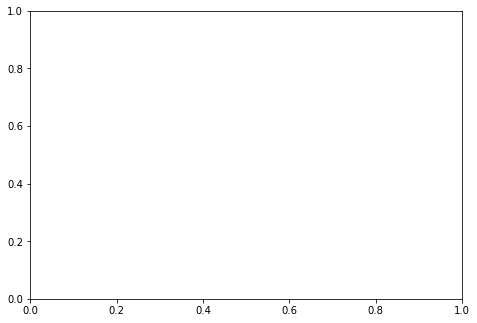

In [57]:
nx.draw(F, with_labels = "True")

In [56]:
print("Densidade : ", nx.density(F))
print("Coeficiente de agrupamento : ", nx.transitivity(F))
print("Reciprocidade :" , nx.reciprocity(F))
hgrauF = nx.degree_histogram(F)
grausF = np.linspace(0 , len(hgrauF), len(hgrauF))

Densidade :  3.360611141261249e-05
Coeficiente de agrupamento :  0.044648871939563066
Reciprocidade : 0.14378718052491177


In [58]:
# Networkx ainda não tem uma função como degree_histogram () para arestas
# saintes ou entrantes .
hgrauinF = [0]*len(hgrauF)
for ver, grau in F.in_degree():
    hgrauinF[grau] = hgrauinF[grau] + 1
    hgrauouF = [0]*len(hgrauF)
for ver, grau in F.out_degree():
    hgrauouF[grau] = hgrauouF[grau] + 1

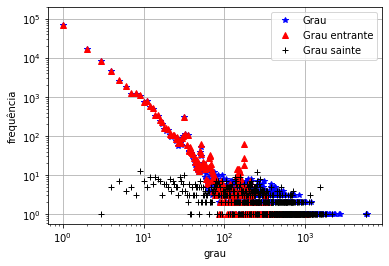

In [59]:
plt.figure()
plt.loglog(grausF,hgrauF,'b*',label='Grau')
plt.loglog(grausF,hgrauinF,'r^',label='Grau entrante')
plt.loglog(grausF,hgrauouF,'k+',label='Grau sainte')
plt.xlabel('grau')
plt.ylabel('frequência')
plt.legend()
plt.grid()

In [60]:
nucleo = [vert for vert, grau in F.degree() if grau >= 10]
N = nx.subgraph(F, nucleo)

In [61]:
# Elimina o atributo "contraction" dos nos
for (n,d) in N.nodes(data=True):
    try:
        del d["contraction"]
    except:
        continue

In [62]:
# Elimina todos os atributos das arestas
for n1, n2, d in N.edges(data=True):
    d.clear()

In [63]:
print("{} nos, {} arestas".format(len(N), nx.number_of_edges(N)))
nx.write_graphml(N, "wiki-fortaleza.graphml")

7686 nos, 258599 arestas
